# Tensor 编程练习

请尝试使用学到的tensor知识，完成下述问题。

In [77]:
import torch
import cv2
img = cv2.imread(r"..\template.jpg")  
'''之前遇到相对路径失败的问题，后面发现是因为我当前的tensor_exercise_py3文件是在practices文件夹下面,
然后使用 ./template.jpg 会去practices文件夹下面找,但是实际上template.jpg是在practices文件夹的上一级文件夹（ALo文件夹）下面
所以最后需要使用 ../template.jpg
'''

'之前遇到相对路径失败的问题，后面发现是因为我当前的tensor_exercise_py3文件是在practices文件夹下面,\n然后使用 ./template.jpg 会去practices文件夹下面找,但是实际上template.jpg是在practices文件夹的上一级文件夹下面\n所以最后需要使用 ../template.jpg\n'

### 1. tensor的创建、属性修改、索引、拼接、维度调整等

（1）使用opencv读取的图像默认是BGR三通道的ndarrays格式，数据类型是uint8。基于pytorch实现的神经网络往往要求输入数据使用float32类型，请创建一个和img具有相同内容的tensor，并将其数据类型调整为float32。

In [78]:
tensor_img = torch.tensor(img, dtype=torch.float32)

（2）请取出该tensor表示的图像的上半部分，即对于尺寸为（48，48，3）的图像取出前24行得到尺寸为（24，48，3）的tensor，命名为img_top。类似地，请再取出图像的下半部分，得到另一个尺寸为（24，48，3）的tensor，命名为img_down。

In [79]:
img_top = tensor_img[:24]
img_down = tensor_img[24:]

（3）请将img_down置于img_top上方对二者进行拼接，得到尺寸为（48，48，3）的tensor，命名为img_cat。


In [80]:
img_cat = torch.cat((img_down,img_top),dim=0)
print(img_cat.shape)

torch.Size([48, 48, 3])


（4）在pytorch实现的神经网络中，往往要求输入图像具有(batch_size, channel, height, width)的维度顺序。请将拼接后的img_cat从(height, width, channel)的维度顺序调整为(batch_size, channel, height, width)的顺序，命名为img_pytorch, 其中batch_size应为1。

In [81]:
img_cat = img_cat.permute(2,0,1) #先通道转化
print(img_cat.shape)
img_pytorch = img_cat.unsqueeze(0) #再增加batch_size维度
print(img_pytorch.shape)

torch.Size([3, 48, 48])
torch.Size([1, 3, 48, 48])


### 2. tensor的数学运算

（1）提供的模板图像是一幅黑白图像，可以很容易地根据三通道值之和是否为0来区分背景和前景。请据此得到img_pytorch的前景mask，命名为img_mask，img_mask应具有(batch_size, height, width)的维度，并且数据类型应为float32。

In [82]:
sums = img_pytorch.sum(dim=1,keepdim=True).repeat(1,3,1,1)
img_mask = (sums!=0).type(torch.float32)
print(img_mask.shape)

torch.Size([1, 3, 48, 48])


（2）请对img_pytorch的前景部分添加在[-50, 0]之间均匀分布的随机噪声，结果命名为img_noise，可以使用前面获得的前景mask。

In [83]:
img_pytorch = img_pytorch + img_mask*(torch.rand(img_pytorch.shape)*50-50)  #加入噪声，rand(shape)返回的是[0,1]之间的均匀分布，使用缩放和平移来获得在[-50,0]之间均匀分布的噪声
img_pytorch = img_pytorch.clamp(0,255) #将超出[0,255]的值限制在[0,255]之间（截断）
#print(img_pytorch.shape) 
#print(img_pytorch[0].type(torch.uint8).numpy().shape) 检验一下得到的张量是否正确

(3, 48, 48)


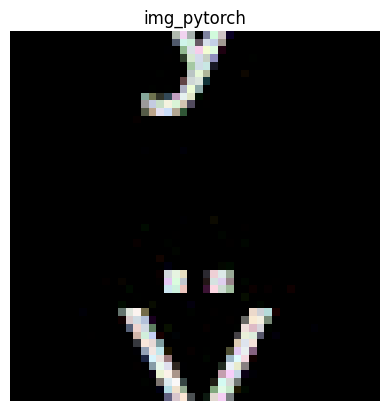

In [84]:
# 这一段代码单纯是用来显示图片的
import matplotlib.pyplot as plt
def imshow(img, title=None):
    plt.figure()
    plt.imshow(img, cmap='gray')
    if title is not None:
         plt.title(title)
    plt.axis('off')
print(img_pytorch[0].type(torch.uint8).numpy().shape)
imshow(img_pytorch[0].permute(1,2,0).type(torch.uint8).numpy(),"img_pytorch")